In [2]:
import pandas as pd
import lightgbm as lgm
from pandas_profiling import ProfileReport


from pycaret.regression import *

In [102]:
import pandas as pd
import lightgbm as lgbm
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('../../Downloads/housing.csv', dtype = {'chas':'category'})
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('medv', axis=1), df['medv'])

In [65]:
model = lgbm.LGBMRegressor()

In [66]:
model.fit(X_train, y_train)

LGBMRegressor()

In [67]:
prediction = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
mean_absolute_error(y_test, prediction),  mean_squared_error(y_test, prediction), r2_score(y_test, prediction)

(2.1277232228444958, 12.24338705981477, 0.8374218333760162)

In [73]:
model.feature_importances_

array([135,  14,  49,   2, 139, 208, 139, 202,  27,  70,  84, 125, 212],
      dtype=int32)

In [81]:
feat_imp = pd.DataFrame({'feat_name':model.feature_name_, 'importance':model.feature_importances_})
feat_imp = feat_imp.set_index('feat_name').sort_values('importance',ascending=False)

<AxesSubplot:xlabel='feat_name'>

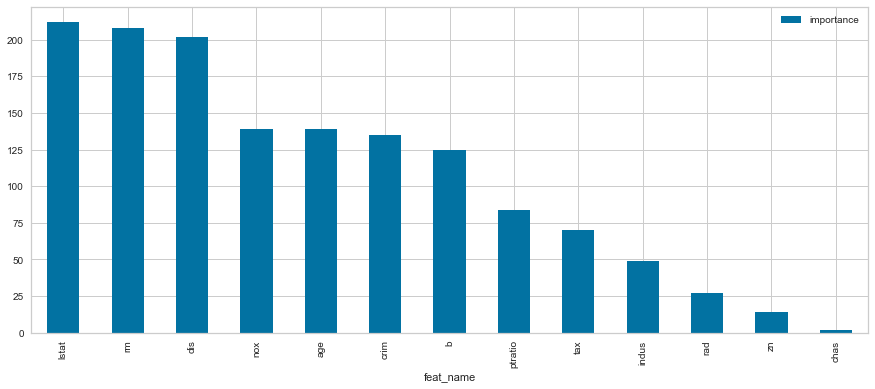

In [86]:
feat_imp.plot(kind='bar', figsize=(15,6))

<AxesSubplot:ylabel='Density'>

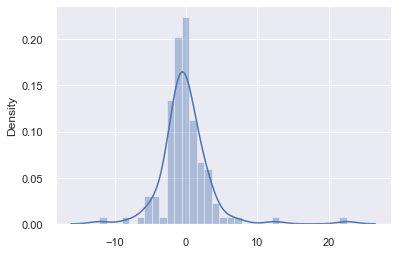

In [103]:
sns.distplot(y_test.values - prediction)

In [105]:
import matplotlib.pyplot as plt

<AxesSubplot:>

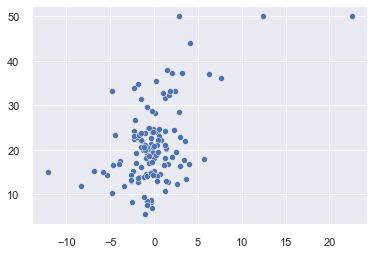

In [118]:
sns.scatterplot(y_test.values - prediction, y_test.values)

<AxesSubplot:>

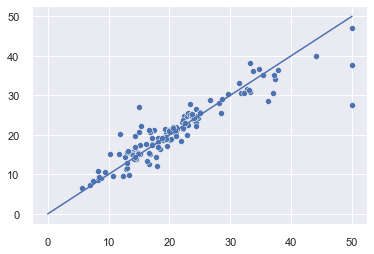

In [117]:
sns.scatterplot(y_test.values, prediction)
sns.lineplot(x=[0,50], y=[0,50])

In [56]:
from pycaret.regression import *
df = pd.read_csv('../../Downloads/housing.csv', dtype = {'chas':'category'})
s = setup(df, target = 'medv', categorical_features=['chas'])

,Description,Value
0,Session id,2423
1,Target,medv
2,Target type,Regression
3,Data shape,"(506, 14)"
4,Train data shape,"(354, 14)"
5,Test data shape,"(152, 14)"
6,Ordinal features,1
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [57]:
best = compare_models(include = ['lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.5461,15.1340,3.7995,0.8283,0.1671,0.1289,0.7560


Processing:   0%|          | 0/9 [00:00<?, ?it/s]

In [59]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…